In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-01-05 09:09:46--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-01-05 09:09:46 (55.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [6]:
data = pd.read_csv("moore.csv", header=None).values

X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

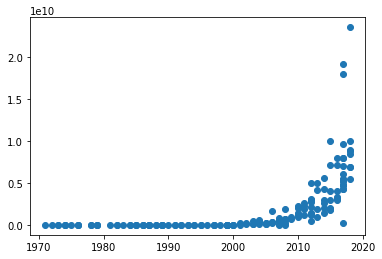

In [7]:
plt.scatter(X, Y)
plt.show()

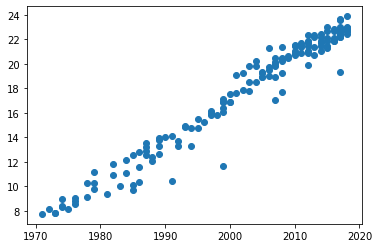

In [8]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [9]:
X = X - X.mean()

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(1,)), 
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
              loss=tf.keras.losses.mean_squared_error)

def schedule(epoch, lr):
    if (epoch >= 50):
        return 0.0001
    return 0.001

schedular = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(x=X, y=Y, 
              epochs=200, callbacks=[schedular])

Epoch 1/200
6/6 [==============================] - 2s 2ms/step - loss: 732.8000
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 790.3530
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 717.5853
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 583.1287
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 322.3448
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 204.3788
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 168.0294
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 117.3780
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 62.7178
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 38.2643
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 28.4202
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 20.3946
Epoch 13/200
6/6 [=======================

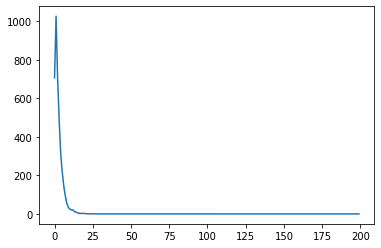

In [11]:
plt.plot(r.history["loss"], label="val_loss")
plt.show()

In [13]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33531895]], dtype=float32), array([17.775951], dtype=float32)]


In [16]:
# the slope of the line
a = model.layers[0].get_weights()[0][0, 0]

In [17]:
a

0.33531895

In [18]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0671279531752615
